# Exploratory Data Analysis and Data Cleansing

## Name: Mohammad Zaki Gundagi

For this project, we are required to analyze your dataset,find and fix the problems in the data. We have been provided with three datasets - Dirty data, missing data & outlier data. We have to fix the issues in all three datasets.

### Importing Libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
import re
import datetime
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

from sklearn.linear_model import LinearRegression
import math

### Loading Files

We have been provided with 3 files on which to work. These files are:
- 30757983_dirty_data.csv
- 30757983_missing_data.csv
- 30757983_outlier_data.csv
    
We also have a warehouses.csv file which contains the geolocation of our warehouses.

In [2]:
dirty_data = pd.read_csv("30757983_dirty_data.csv")
missing_data = pd.read_csv("30757983_missing_data.csv")
outlier_data = pd.read_csv("30757983_outlier_data.csv")
warehouse = pd.read_csv("warehouses.csv")

## Dirty Data

Let us have a look at our dirty data.

In [3]:
print(dirty_data.shape)
dirty_data.head()

(500, 16)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD104215,ID0277517039,12-02-2019,Thompson,"[('Olivia x460', 1), ('iStream', 2)]",1525,60.14,-37.806236,144.957986,15,1356.39,Summer,False,1.1980,nothing the stylus pen will not stay in the ho...,False
1,ORD271312,ID1479928144,2019-05-19,Thompson,"[('Lucent 330S', 2), ('Olivia x460', 1), ('Can...",8475,63.76,-37.820849,144.955155,0,8538.76,Autumn,True,1.1550,"iassist is pretty dumb ,,,",False
2,ORD488745,ID3215192039,2019-07-24,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Candle...",20790,73.95,-37.808236,144.947340,5,19824.45,Winter,True,0.4945,ended up with 3 of these for children great ec...,True
3,ORD464435,ID0076459258,2019-10-18,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Candle ...",3470,79.66,144.933997,-37.809314,10,3202.66,Spring,False,1.2089,happy i purchased! love this phone and it is s...,True
4,ORD232482,ID0260906820,2019-06-10,Bakers,"[('Toshika 750', 1), ('Thunder line', 1), ('iS...",19420,70.05,-37.823178,145.013849,25,14635.05,Winter,True,2.1985,i would love this but there is no way to stop ...,False


We have 500 rows and 16 columns. 

As provided to us in the problem specifications,3 attributes (coupon_discount, delivery_charges & The ordered quantity values in the shopping_cart attribute) don't have any errors.

In [4]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
order_id                         500 non-null object
customer_id                      500 non-null object
date                             500 non-null object
nearest_warehouse                500 non-null object
shopping_cart                    500 non-null object
order_price                      500 non-null int64
delivery_charges                 500 non-null float64
customer_lat                     500 non-null float64
customer_long                    500 non-null float64
coupon_discount                  500 non-null int64
order_total                      500 non-null float64
season                           500 non-null object
is_expedited_delivery            500 non-null bool
distance_to_nearest_warehouse    500 non-null float64
latest_customer_review           500 non-null object
is_happy_customer                500 non-null bool
dtypes: bool(2), float64(5), int64(2), object(7)

We can see that there is no missing data.

In [5]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13525.650000,75.915500,-27.942466,135.096190,10.220000,12098.154520,1.091128
std,7555.494804,13.594682,41.351157,41.353157,8.419821,6883.192083,0.520329
min,1010.000000,46.810000,-37.827150,-37.825316,0.000000,980.060000,0.045400
25%,7538.750000,66.345000,-37.818385,144.950052,5.000000,6752.837500,0.727150
50%,11775.000000,75.450000,-37.811856,144.962621,10.000000,10946.350000,1.039750
75%,18276.250000,82.057500,-37.804247,144.978066,15.000000,16251.722500,1.405125
max,39330.000000,112.010000,145.007775,145.020570,25.000000,41438.860000,2.850200


In [6]:
dirty_data.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,493,290,6,462,8,500
top,ORD255566,ID0708721951,2019-05-01,Thompson,"[('Thunder line', 1), ('iAssist Line', 2)]",Autumn,mi wife loves it. bought this for my wife as a...
freq,1,3,6,207,3,138,1


In [7]:
missing_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.000000,500.000000,500.000000,500.000000,485.000000,469.000000,460.000000
mean,13203.979381,76.298370,-37.812649,144.967979,11.510000,11770.086165,1.069363,0.760870
std,7828.772962,14.322793,0.007324,0.021627,8.655619,7041.586293,0.481632,0.427017
min,1010.000000,46.690000,-37.827150,144.916005,0.000000,908.970000,0.064400,0.000000
25%,6900.000000,65.770000,-37.818881,144.952449,5.000000,6248.190000,0.733900,1.000000
50%,11900.000000,76.325000,-37.813227,144.965218,10.000000,10472.010000,1.032300,1.000000
75%,18530.000000,83.515000,-37.806491,144.982808,15.000000,16507.110000,1.370900,1.000000
max,39330.000000,114.520000,-37.798217,145.020271,25.000000,39390.390000,2.792500,1.000000


In [8]:
missing_data[missing_data["delivery_charges"]>90]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
20,ORD257693,ID0247008053,2019-09-07,Nickolson,"[('Candle Inferno', 1), ('Thunder line', 2), (...",6015.0,102.20,-37.810490,144.968182,5,5816.45,Spring,True,0.9103,five stars works perfect good company,NaN
26,ORD062844,ID0332546101,2019-01-19,Thompson,"[('iStream', 2), ('Lucent 330S', 2), ('iAssist...",9305.0,92.65,-37.806092,144.944799,10,8467.15,Summer,True,0.7593,great phone! great phone!,1.0
43,ORD123137,ID6167344523,2019-01-11,Nickolson,"[('Toshika 750', 2), ('Universe Note', 2), ('p...",28160.0,92.70,-37.813137,144.968420,25,21212.70,Summer,True,0.6156,no problems after 5 months i purchased this ph...,1.0
57,ORD257163,ID2501489820,2019-11-15,Bakers,"[('Lucent 330S', 1), ('Universe Note', 1)]",4680.0,103.91,-37.811682,144.983173,5,4549.91,Spring,True,1.0770,be patient when we first got it.it was freezin...,1.0
68,ORD247576,ID0250933574,2019-02-23,NaN,"[('Olivia x460', 1), ('Thunder line', 1), ('Lu...",5865.0,103.51,-37.822671,145.007735,25,4502.26,Summer,True,NaN,xp lumia 920 better than alcon 5s best phone e...,1.0
69,ORD200055,ID0301548245,2019-11-21,Bakers,"[('Lucent 330S', 1), ('Universe Note', 1), ('T...",9000.0,104.46,-37.805230,144.985454,10,8204.46,Spring,True,1.0105,"happy , happy, happy ! i love the size and i d...",1.0
71,ORD311652,ID3130999251,2019-01-24,Bakers,"[('Lucent 330S', 2), ('Thunder line', 1)]",4640.0,100.45,-37.813288,145.010415,25,3580.45,Summer,True,1.3846,works great! bought it for my boyfriend for hi...,1.0
72,ORD164647,ID6167231031,2019-11-06,Nickolson,"[('Alcon 10', 2), ('Thunder line', 2), ('Olivi...",24710.0,103.67,-37.813225,144.959461,0,24813.67,Spring,True,1.0699,four stars everything perfect! very good product,1.0
78,ORD389671,ID0291211342,2019-01-27,Thompson,"[('Candle Inferno', 2), ('Universe Note', 1), ...",8670.0,97.97,-37.808365,144.961101,25,6600.47,Summer,True,1.3239,bought this candle for my dad for christmas. h...,1.0
79,ORD491839,ID0227770320,2019-09-21,Bakers,"[('Candle Inferno', 1), ('iAssist Line', 2)]",4880.0,91.14,-37.800690,144.983976,5,4727.14,Spring,True,1.4329,doesn’t work on t-mobile we took it to t-mobil...,0.0


Few Observations:

- 'season' has 8 values which seems wronog as we've been specified there are only 4 seasons.
- 'nearest_warehouse' has 6 values which seems wronog as we've been specified there are only 3 warehouses.
- 'is_expedited_delivery' & 'is_happy_customer' seem to be Boolean values.


### Fixing the 'date' errors

Let us have a look at the date.

In [9]:
dirty_data['date'].head(20)

0     12-02-2019
1     2019-05-19
2     2019-07-24
3     2019-10-18
4     2019-06-10
5     2019-07-12
6     2019-09-13
7     2019-03-16
8     2019-12-02
9     2019-12-04
10    2019-04-03
11    2019-12-04
12    2019-03-30
13    2019-06-30
14    2019-07-30
15    2019-03-02
16    2019-07-25
17    2019-08-01
18    2019-12-31
19    2019-01-30
Name: date, dtype: object

Our specified date format is 'YYYY-MM-DD' but we can see that not all date formats follow this format.

In [10]:
#Creating the correct format for the date
for index, row in dirty_data.iterrows():
    try:
        # Format: Year-month-date
        a = datetime.datetime.strptime(str(row['date']), "%Y-%m-%d").date()
    except:
        try:
            # Format: Year-date-month
            a = datetime.datetime.strptime(str(row['date']), "%Y-%d-%m").date()
        except:
            try:
                #Format: date-month-Year
                a = datetime.datetime.strptime(str(row['date']),"%d-%m-%Y").date()
            except:
                try:
                    #Format: date-month-year
                    a = datetime.datetime.strptime(str(row['date']),"%m-%d-%Y").date()
                except:
                    # if that day does not exist in the month, replacing it with the first day of next month
                    dates = row['date'].split('-')
                    dates[1] = str(int(dates[1]) + 1)
                    dates[2] = "01"
                    date = '-'.join(dates)
                    a = datetime.datetime.strptime(date, "%Y-%m-%d").date()
    dirty_data.loc[index,'date'] = a

After looking at all the incorrect date formats, let's try to use the different formats to convert them.

In [11]:
dirty_data['date'].head(20)

0     2019-02-12
1     2019-05-19
2     2019-07-24
3     2019-10-18
4     2019-06-10
5     2019-07-12
6     2019-09-13
7     2019-03-16
8     2019-12-02
9     2019-12-04
10    2019-04-03
11    2019-12-04
12    2019-03-30
13    2019-06-30
14    2019-07-30
15    2019-03-02
16    2019-07-25
17    2019-08-01
18    2019-12-31
19    2019-01-30
Name: date, dtype: object

We can see that our date formats have been fixed.

### Fixing the 'customer_lat' & 'customer_long' errors

As our stores are in Melbourne, our latitudes and longitudes should be in that area. 

In [12]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13525.650000,75.915500,-27.942466,135.096190,10.220000,12098.154520,1.091128
std,7555.494804,13.594682,41.351157,41.353157,8.419821,6883.192083,0.520329
min,1010.000000,46.810000,-37.827150,-37.825316,0.000000,980.060000,0.045400
25%,7538.750000,66.345000,-37.818385,144.950052,5.000000,6752.837500,0.727150
50%,11775.000000,75.450000,-37.811856,144.962621,10.000000,10946.350000,1.039750
75%,18276.250000,82.057500,-37.804247,144.978066,15.000000,16251.722500,1.405125
max,39330.000000,112.010000,145.007775,145.020570,25.000000,41438.860000,2.850200


We can see the max values for customer_lat and min values for customer_long show that the values aren't all correct. Let us try to fix that.

In [13]:
dirty_data[dirty_data['customer_lat'] >= -35]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
3,ORD464435,ID0076459258,2019-10-18,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Candle ...",3470,79.66,144.933997,-37.809314,10,3202.66,Spring,False,1.2089,happy i purchased! love this phone and it is s...,True
31,ORD204510,ID2384091391,2019-08-20,Nickolson,"[('iStream', 2), ('Candle Inferno', 1), ('Alco...",11905,61.39,144.972011,-37.814998,0,11966.39,Winter,True,0.4551,phone not in good conditio my phone arrived wi...,False
70,ORD179862,ID0091971021,2019-04-22,Thompson,"[('Candle Inferno', 2), ('Toshika 750', 1)]",5180,46.81,144.948716,-37.817830,5,4967.81,Autumn,False,0.5921,"not unlocked it’s not unlocked, had to pay ext...",False
72,ORD030494,ID5002595026,2019-08-31,Thompson,"[('pearTV', 2), ('Universe Note', 2), ('Alcon ...",28770,64.14,144.953201,-37.812373,10,25957.14,Winter,False,0.5404,great phone at a great price! dude...all i hav...,True
98,ORD275619,ID0628182650,2019-07-14,Thompson,"[('iStream', 1), ('Candle Inferno', 1), ('pear...",13790,60.68,144.948544,-37.812768,25,10403.18,Winter,False,0.1301,great phone i use this product for personal use.,True
119,ORD075385,ID0575429242,2019-02-13,Nickolson,"[('Universe Note', 2), ('pearTV', 1), ('Thunde...",24030,77.69,144.983300,-37.818763,25,18100.19,Summer,False,1.2092,the operating system does not let the fingerpr...,True
156,ORD363962,ID1224821945,2019-06-07,Thompson,"[('Thunder line', 2), ('iAssist Line', 1), ('T...",10905,75.45,144.938523,-37.812337,15,9344.70,Winter,True,0.7525,very useful myself,True
158,ORD357412,ID1283637398,2019-01-09,Thompson,"[('Universe Note', 2), ('Olivia x460', 2), ('p...",17840,79.82,144.957049,-37.802139,5,17027.82,Summer,False,1.4647,i like it but i bought it used i like it but i...,True
159,ORD237097,ID3983269229,2019-01-21,Bakers,"[('iStream', 2), ('Thunder line', 2), ('iAssis...",6885,98.68,144.988305,-37.821196,0,6983.68,Summer,True,1.3876,good one nice,True
162,ORD464160,ID0577456440,2019-02-06,Bakers,"[('Olivia x460', 2), ('Alcon 10', 2), ('Thunde...",22530,80.69,144.988553,-37.823146,25,16978.19,Summer,False,1.5772,my fav phone google is growing and i'm not buy...,True


It seems that the values for 'customer_lat' & 'customer_long' have become swapped with each other. Let us fix this.

In [14]:
swapIdx = (dirty_data['customer_lat'] >= -35)
dirty_data.loc[swapIdx, ['customer_lat', 'customer_long']] = dirty_data.loc[swapIdx, ['customer_long', 'customer_lat']].values

In [15]:
dirty_data[dirty_data['customer_lat'] >= -35]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


In [16]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13525.650000,75.915500,-37.812314,144.966038,10.220000,12098.154520,1.091128
std,7555.494804,13.594682,0.007516,0.020744,8.419821,6883.192083,0.520329
min,1010.000000,46.810000,-37.827150,144.916626,0.000000,980.060000,0.045400
25%,7538.750000,66.345000,-37.818670,144.952004,5.000000,6752.837500,0.727150
50%,11775.000000,75.450000,-37.812767,144.963532,10.000000,10946.350000,1.039750
75%,18276.250000,82.057500,-37.805899,144.979879,15.000000,16251.722500,1.405125
max,39330.000000,112.010000,-37.792630,145.020570,25.000000,41438.860000,2.850200


We can see now that there no more such values and we have fixed our geolocation errors.

### Fixing Lexical errors in 'nearest_warehouse' 

We've been specified that there are 3 warehouses available. Let us find how many unique warehouses are in the data.

In [17]:
# Shows us the count of unque warehouse names
dirty_data.nearest_warehouse.value_counts()

Thompson     207
Nickolson    164
Bakers       110
bakers         7
thompson       6
nickolson      6
Name: nearest_warehouse, dtype: int64

We can see that some lexical errors have arisen. Using the 'warehouses.csv' file, let us find the correct spelling of the respective warehouses.

In [18]:
#display records of warehouse data
warehouse.head()

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


Let us now change all the wrong spellings to the right ones.

In [19]:
#Replace incorrect warehouse names with the correct ones
dirty_data.nearest_warehouse.replace({"bakers": "Bakers", "nickolson": "Nickolson",\
                                      "thompson":"Thompson"}, inplace=True)

In [20]:
# Shows us the count of unque warehouse names
dirty_data.nearest_warehouse.value_counts()

Thompson     213
Nickolson    170
Bakers       117
Name: nearest_warehouse, dtype: int64

As we can see now, there are just 3 warehouses as they should be.

### Fixing Lexical Errors in 'season'

Let us have a look at the Seasons column. Keep in mind that we have only 4 seasons.

In [21]:
#check unique season names
dirty_data['season'].unique()

array(['Summer', 'Autumn', 'Winter', 'Spring', 'summer', 'winter',
       'spring', 'autumn'], dtype=object)

We can see some lexical errors regarding the Season names. Let us fix this.

In [22]:
# Replace incorrect season names with corrent ones
dirty_data.season.replace({"summer": "Summer", "spring": "Spring", "autumn":"Autumn","winter":"Winter"}, inplace=True)

In [23]:
#check unique season names
dirty_data['season'].unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

As we can see after our operations, we have 4 seasons as intended.

### Checking Dates with Seasons

Our dates should coincide with the Seasons. What it means is that the dates in those corresponding months should match with their Seasons. We will have to look at each season seperately and check it. If we find incorrect data, we will change the Seasons to match the dates.

In [24]:
winter_months = [6,7,8]
summer_months = [12,1,2]
spring_months = [9,10,11]
autumn_months = [3,4,5]

In [25]:
#Dividing data into different seasons
dirty_data_w= dirty_data[dirty_data["date"].map(lambda t: t.month in winter_months)]
dirty_data_sr= dirty_data[dirty_data["date"].map(lambda t: t.month in summer_months)]
dirty_data_sg= dirty_data[dirty_data["date"].map(lambda t: t.month in spring_months)]
dirty_data_a= dirty_data[dirty_data["date"].map(lambda t: t.month in autumn_months)]

#### Checking Seasons for Winter season

In [26]:
dirty_data_w["season"].unique()

array(['Winter', 'Summer', 'Spring'], dtype=object)

Although this dataset should contain only Winter as a season, we find other seasons as well. Let us try to change them to winter.

In [27]:
for index,row in dirty_data_w.iterrows():
    dirty_data_w.at[index,'season'] = "Winter"

In [28]:
dirty_data_w["season"].unique()

array(['Winter'], dtype=object)

#### Checking Seasons for Summer season

In [29]:
dirty_data_sr["season"].unique()

array(['Summer', 'Winter', 'Autumn', 'Spring'], dtype=object)

Although this dataset should contain only Summer as a season, we find other seasons as well. Let us try to change them to Summer.

In [30]:
for index,row in dirty_data_sr.iterrows():
    dirty_data_sr.at[index,'season'] = "Summer"

In [31]:
dirty_data_sr["season"].unique()

array(['Summer'], dtype=object)

#### Checking Seasons for spring season

In [32]:
dirty_data_sg["season"].unique()

array(['Spring', 'Summer', 'Winter'], dtype=object)

Although this dataset should contain only Spring as a season, we find other seasons as well. Let us try to change them to Spring.

In [33]:
for index,row in dirty_data_sg.iterrows():
    dirty_data_sg.at[index,'season'] = "Spring"

In [34]:
dirty_data_sg["season"].unique()

array(['Spring'], dtype=object)

#### Checking Seasons for Autumn season

In [35]:
dirty_data_a["season"].unique()

array(['Autumn', 'Winter', 'Summer'], dtype=object)

Although this dataset should contain only Autumn as a season, we find other seasons as well. Let us try to change them to Autumn.

In [36]:
for index,row in dirty_data_a.iterrows():
    dirty_data_a.at[index,'season'] = "Autumn"

In [37]:
dirty_data_a["season"].unique()

array(['Autumn'], dtype=object)

In [38]:
dirty_data = pd.concat([dirty_data_a,dirty_data_w,dirty_data_sg,dirty_data_sr],sort=False)

In [39]:
dirty_data.sort_index(inplace=True)
print(dirty_data.shape)
dirty_data.head()

(500, 16)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD104215,ID0277517039,2019-02-12,Thompson,"[('Olivia x460', 1), ('iStream', 2)]",1525,60.14,-37.806236,144.957986,15,1356.39,Summer,False,1.1980,nothing the stylus pen will not stay in the ho...,False
1,ORD271312,ID1479928144,2019-05-19,Thompson,"[('Lucent 330S', 2), ('Olivia x460', 1), ('Can...",8475,63.76,-37.820849,144.955155,0,8538.76,Autumn,True,1.1550,"iassist is pretty dumb ,,,",False
2,ORD488745,ID3215192039,2019-07-24,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Candle...",20790,73.95,-37.808236,144.947340,5,19824.45,Winter,True,0.4945,ended up with 3 of these for children great ec...,True
3,ORD464435,ID0076459258,2019-10-18,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Candle ...",3470,79.66,-37.809314,144.933997,10,3202.66,Spring,False,1.2089,happy i purchased! love this phone and it is s...,True
4,ORD232482,ID0260906820,2019-06-10,Bakers,"[('Toshika 750', 1), ('Thunder line', 1), ('iS...",19420,70.05,-37.823178,145.013849,25,14635.05,Winter,True,2.1985,i would love this but there is no way to stop ...,False


### Fixing 'order_price' errors

Let us try to find if any errors exist in the 'order_price' column. For that we'll have to find the individual price of shopping cart items and then verifying it with the order price.

#### Finding individual prices of shopping cart items

Our specification tells us that we should have 10 items for sale. Let us try to verify this and also try to find out the individual price of each item. With that we can check whether the column 'order_price' has the correect value or not. We have used the outlier_data for this as we can be sure of the values in it.

In [40]:
#find individual items in shopping list
cart = []

for index, row in outlier_data.iterrows():
    list_cart = []
    i = 0
    check = "("
    for check in row["shopping_cart"]:
        i = i+1
    list_cart = row["shopping_cart"].split(",", i)
    for item in list_cart:
        matches = re.findall(r"\'(.+?)\'", item)
        cart.append(",".join(matches))
        
cart_items = set(cart)
cart_items.remove("")

full_cart = list(cart_items)
full_cart

['Candle Inferno',
 'Lucent 330S',
 'Olivia x460',
 'iStream',
 'iAssist Line',
 'Alcon 10',
 'Toshika 750',
 'pearTV',
 'Universe Note',
 'Thunder line']

In [41]:
#create dictionary of individual items
full_cart_dict = { i : full_cart[i] for i in range(0, len(full_cart) ) }
full_cart_dict

{0: 'Candle Inferno',
 1: 'Lucent 330S',
 2: 'Olivia x460',
 3: 'iStream',
 4: 'iAssist Line',
 5: 'Alcon 10',
 6: 'Toshika 750',
 7: 'pearTV',
 8: 'Universe Note',
 9: 'Thunder line'}

We can see that our dataset has 10 items, which validates the problem specification.

Using the outlier_data again, let us generate the individual prices for each item in the cart.

In [42]:
#finding individual prices
ind =0
count_list = []
price_list = []
for item in outlier_data['shopping_cart']:
    all_items = eval(item)
    
    counter_list=[]
    for key, value in full_cart_dict.items():
        count = 0
        for each_item in all_items:
            if each_item[0]== value:
                counter_list.append(each_item[1])
                count += 1
        if count != 1:
            counter_list.append(0)

    count_list.append(counter_list)
    price_list.append(outlier_data['order_price'][ind])
    ind += 1


In [43]:

a = np.array(count_list)
b = np.array(price_list)
individual_prices = np.linalg.lstsq(a, b)#using the np.linalg as specified

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
individual_prices

(array([ 430., 1230., 1225.,  150., 2225., 8950., 4320., 6310., 3450.,
        2180.]),
 array([3.31199171e-21]),
 10,
 array([33.33164648, 18.89594403, 18.10311008, 17.70253315, 17.36774855,
        16.9981454 , 16.66501572, 16.17006679, 15.41050495, 15.21805702]))

In [45]:
every_price=[]
each_price = []
each_price = individual_prices[0]
for each in each_price:
    each = round(each,2)
    every_price.append(each)
cart_dictionary = dict(zip(full_cart,every_price))

In [46]:
cart_dictionary

{'Candle Inferno': 430.0,
 'Lucent 330S': 1230.0,
 'Olivia x460': 1225.0,
 'iStream': 150.0,
 'iAssist Line': 2225.0,
 'Alcon 10': 8950.0,
 'Toshika 750': 4320.0,
 'pearTV': 6310.0,
 'Universe Note': 3450.0,
 'Thunder line': 2180.0}

Thus, we finally have our individual prices. They are:

- iAssist Line - 2225.0
- Alcon 10 - 8950.0
- iStream - 150.0
- pearTV - 6310.0
- Universe Note - 3450.0
- Thunder line - 2180.0
- Candle Inferno - 430.0
- Toshika 750 - 4320.0
- Lucent 330S - 1230.0
- Olivia x460 - 1225.0

#### Calculating order price

Let us try to calculate the order price for dirty_data now.

In [47]:
#finding individual prices
ind =0
count_list = []
price_list = []
for item in dirty_data['shopping_cart']:
    all_items = eval(item)
    
    counter_list=[]
    for key, value in full_cart_dict.items():
        count = 0
        for each_item in all_items:
            if each_item[0]== value:
                counter_list.append(each_item[1])
                count += 1
        if count != 1:
            counter_list.append(0)

    count_list.append(counter_list)
    price_list.append(outlier_data['order_price'][ind])
    ind += 1


In [48]:
#Reference: https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
individual_prices = list(individual_prices)
a = np.array(count_list)
b = np.array([individual_prices[0]])
b=np.transpose(b)
final_order_price = np.matmul(a,b)
final_price=[]
for each in final_order_price:
    final_price.append(each[0])
dirty_data['order_price']=final_price

In [49]:
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD104215,ID0277517039,2019-02-12,Thompson,"[('Olivia x460', 1), ('iStream', 2)]",1525.0,60.14,-37.806236,144.957986,15,1356.39,Summer,False,1.1980,nothing the stylus pen will not stay in the ho...,False
1,ORD271312,ID1479928144,2019-05-19,Thompson,"[('Lucent 330S', 2), ('Olivia x460', 1), ('Can...",8475.0,63.76,-37.820849,144.955155,0,8538.76,Autumn,True,1.1550,"iassist is pretty dumb ,,,",False
2,ORD488745,ID3215192039,2019-07-24,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Candle...",20790.0,73.95,-37.808236,144.947340,5,19824.45,Winter,True,0.4945,ended up with 3 of these for children great ec...,True
3,ORD464435,ID0076459258,2019-10-18,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Candle ...",3470.0,79.66,-37.809314,144.933997,10,3202.66,Spring,False,1.2089,happy i purchased! love this phone and it is s...,True
4,ORD232482,ID0260906820,2019-06-10,Bakers,"[('Toshika 750', 1), ('Thunder line', 1), ('iS...",19420.0,70.05,-37.823178,145.013849,25,14635.05,Winter,True,2.1985,i would love this but there is no way to stop ...,False


### Fixing 'order_total' errors

We have been provided with the Total Order Price. The formula for this would be:

- order_total = [ order_price  - (order_price * coupon_discount) / 100 ] + deliver_charges

We will create a new column called check_total with our own calculations. We will then compare it to the 'order_total' column and fix the values if any errors occur.

In [50]:
discount_price = 0
calculated_price = 0
for index, row in dirty_data.iterrows():
   
    if row['coupon_discount'] != 0:
        discount_price = row['coupon_discount']/100
        #print(discount_price)
    else:
        discount_price = 0
    
    calculated_price = row['order_price'] * discount_price
    
    dirty_data.at[index,'check_total'] = (dirty_data.at[index,'order_price'] - calculated_price) + dirty_data.at[index,'delivery_charges']
    
dirty_data['check_total'] = dirty_data['check_total'].round(2) 

In [51]:
i = 0
for index, row in dirty_data.iterrows():
    if (row['order_total'] != row['check_total']):
        i = i+1
        #print(index)
        dirty_data.at[index,'order_total'] = dirty_data.at[index,'check_total']
        
print(i,"rows had incorrect values and have been fixed.")


54 rows had incorrect values and have been fixed.


### Check distance

We also need to verify the 'nearest_warehouse' and 'distance_to_nearest_warehouse' columns. For this we need to use the Haversine formula. 

Link : https://en.wikipedia.org/wiki/Haversine_formula

We will calculate the distance for each customer to each warehouse and then calculate the smallest distance. We will compare the nearest warehouse and smallest distance and then fix the errors.

In [52]:
warehouse

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


In [53]:
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,check_total
0,ORD104215,ID0277517039,2019-02-12,Thompson,"[('Olivia x460', 1), ('iStream', 2)]",1525.0,60.14,-37.806236,144.957986,15,1356.39,Summer,False,1.1980,nothing the stylus pen will not stay in the ho...,False,1356.39
1,ORD271312,ID1479928144,2019-05-19,Thompson,"[('Lucent 330S', 2), ('Olivia x460', 1), ('Can...",8475.0,63.76,-37.820849,144.955155,0,8538.76,Autumn,True,1.1550,"iassist is pretty dumb ,,,",False,8538.76
2,ORD488745,ID3215192039,2019-07-24,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Candle...",20790.0,73.95,-37.808236,144.947340,5,19824.45,Winter,True,0.4945,ended up with 3 of these for children great ec...,True,19824.45
3,ORD464435,ID0076459258,2019-10-18,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Candle ...",3470.0,79.66,-37.809314,144.933997,10,3202.66,Spring,False,1.2089,happy i purchased! love this phone and it is s...,True,3202.66
4,ORD232482,ID0260906820,2019-06-10,Bakers,"[('Toshika 750', 1), ('Thunder line', 1), ('iS...",19420.0,70.05,-37.823178,145.013849,25,14635.05,Winter,True,2.1985,i would love this but there is no way to stop ...,False,14635.05


In [54]:
dirty_data["distance_to_nearest_warehouse"] = dirty_data["distance_to_nearest_warehouse"].round(4)

In [55]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6378):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [56]:
for index,row in dirty_data.iterrows():
    dist_Nickolson = haversine(row["customer_lat"],row["customer_long"],-37.818595,144.969551).round(4)
    dist_Thompson = haversine(row["customer_lat"],row["customer_long"],-37.812673,144.947069).round(4)
    dist_Bakers = haversine(row["customer_lat"],row["customer_long"],-37.809996,144.995232).round(4)
    smallest_dist = min(dist_Nickolson,dist_Thompson,dist_Bakers)
#         print(dist_Nickolson,dist_Thompson,dist_Bakers)
#         print(smallest_dist)
    if dist_Nickolson < dist_Thompson and dist_Nickolson < dist_Bakers:
        #print(dist_Nickolson,dist_Thompson,dist_Bakers)
        dirty_data.at[index,"smallest_dist"] = dist_Nickolson
        dirty_data.at[index,"nearest_warehouse_check"] = "Nickolson"
    elif dist_Thompson < dist_Nickolson and dist_Thompson < dist_Bakers:
        #print("Smallest Thompson")
#       print(dist_Nickolson,dist_Thompson,dist_Bakers)
#             print("############")
        dirty_data.at[index,"smallest_dist"] = dist_Thompson
        dirty_data.at[index,"nearest_warehouse_check"] = "Thompson"
    elif dist_Bakers < dist_Thompson and dist_Bakers < dist_Nickolson:
#             print("Smallest Baker") 
#             print(dist_Nickolson,dist_Thompson,dist_Bakers)
        dirty_data.at[index,"smallest_dist"] = dist_Bakers
        dirty_data.at[index,"nearest_warehouse_check"] = "Bakers"

In [57]:
i = 0
j = 0
for index, row in dirty_data.iterrows():
    if (row['nearest_warehouse'] != row['nearest_warehouse_check']):
        i = i+1
        #print(index)
        dirty_data.at[index,'nearest_warehouse'] = dirty_data.at[index,'nearest_warehouse_check']
    if (row['distance_to_nearest_warehouse'] != row['smallest_dist']):
        if((row['distance_to_nearest_warehouse'] - row['smallest_dist']) > 0.0001):
            j = j+1
            #print("dist not ignore")
            #print(index)
            dirty_data.at[index,'distance_to_nearest_warehouse'] = dirty_data.at[index,'smallest_dist']
        else:
            #k = k+1
            pass
            #print("ignore")
            #print(index)
        
print(i,"rows had incorrect values and have been fixed.")
print(j,"rows had incorrect values and have been fixed.")


17 rows had incorrect values and have been fixed.
16 rows had incorrect values and have been fixed.


### Fixing 'is_happy_customer' errors

Let us now check if the 'ishappy_customer' column has any errors. This column is dependent on the 'latest_customer_review', so we will use the SentimentIntensityAnalyzer from nltk.sentiment.vader. We will cerate a Review column using the compound polarity score of greater than 0.05 as our positive review and then check the columns.

In [58]:
dirty_data['scores'] = dirty_data['latest_customer_review'].apply(lambda review: sid.polarity_scores(review))

dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,check_total,smallest_dist,nearest_warehouse_check,scores
0,ORD104215,ID0277517039,2019-02-12,Thompson,"[('Olivia x460', 1), ('iStream', 2)]",1525.0,60.14,-37.806236,144.957986,15,1356.39,Summer,False,1.1980,nothing the stylus pen will not stay in the ho...,False,1356.39,1.1980,Thompson,"{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp..."
1,ORD271312,ID1479928144,2019-05-19,Thompson,"[('Lucent 330S', 2), ('Olivia x460', 1), ('Can...",8475.0,63.76,-37.820849,144.955155,0,8538.76,Autumn,True,1.1550,"iassist is pretty dumb ,,,",False,8538.76,1.1550,Thompson,"{'neg': 0.347, 'neu': 0.316, 'pos': 0.337, 'co..."
2,ORD488745,ID3215192039,2019-07-24,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Candle...",20790.0,73.95,-37.808236,144.947340,5,19824.45,Winter,True,0.4945,ended up with 3 of these for children great ec...,True,19824.45,0.4944,Thompson,"{'neg': 0.107, 'neu': 0.705, 'pos': 0.189, 'co..."
3,ORD464435,ID0076459258,2019-10-18,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Candle ...",3470.0,79.66,-37.809314,144.933997,10,3202.66,Spring,False,1.2089,happy i purchased! love this phone and it is s...,True,3202.66,1.2089,Thompson,"{'neg': 0.093, 'neu': 0.422, 'pos': 0.485, 'co..."
4,ORD232482,ID0260906820,2019-06-10,Bakers,"[('Toshika 750', 1), ('Thunder line', 1), ('iS...",19420.0,70.05,-37.823178,145.013849,25,14635.05,Winter,True,2.1985,i would love this but there is no way to stop ...,False,14635.05,2.1985,Bakers,"{'neg': 0.155, 'neu': 0.773, 'pos': 0.072, 'co..."


In [59]:
dirty_data['compound_score']  = dirty_data['scores'].apply(lambda score_dict: score_dict['compound'])

dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,check_total,smallest_dist,nearest_warehouse_check,scores,compound_score
0,ORD104215,ID0277517039,2019-02-12,Thompson,"[('Olivia x460', 1), ('iStream', 2)]",1525.0,60.14,-37.806236,144.957986,15,...,Summer,False,1.1980,nothing the stylus pen will not stay in the ho...,False,1356.39,1.1980,Thompson,"{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...",-0.3182
1,ORD271312,ID1479928144,2019-05-19,Thompson,"[('Lucent 330S', 2), ('Olivia x460', 1), ('Can...",8475.0,63.76,-37.820849,144.955155,0,...,Autumn,True,1.1550,"iassist is pretty dumb ,,,",False,8538.76,1.1550,Thompson,"{'neg': 0.347, 'neu': 0.316, 'pos': 0.337, 'co...",-0.0258
2,ORD488745,ID3215192039,2019-07-24,Thompson,"[('Alcon 10', 2), ('Lucent 330S', 2), ('Candle...",20790.0,73.95,-37.808236,144.947340,5,...,Winter,True,0.4945,ended up with 3 of these for children great ec...,True,19824.45,0.4944,Thompson,"{'neg': 0.107, 'neu': 0.705, 'pos': 0.189, 'co...",0.6808
3,ORD464435,ID0076459258,2019-10-18,Thompson,"[('iStream', 1), ('Lucent 330S', 2), ('Candle ...",3470.0,79.66,-37.809314,144.933997,10,...,Spring,False,1.2089,happy i purchased! love this phone and it is s...,True,3202.66,1.2089,Thompson,"{'neg': 0.093, 'neu': 0.422, 'pos': 0.485, 'co...",0.8832
4,ORD232482,ID0260906820,2019-06-10,Bakers,"[('Toshika 750', 1), ('Thunder line', 1), ('iS...",19420.0,70.05,-37.823178,145.013849,25,...,Winter,True,2.1985,i would love this but there is no way to stop ...,False,14635.05,2.1985,Bakers,"{'neg': 0.155, 'neu': 0.773, 'pos': 0.072, 'co...",-0.4588


If the 'latest_customer_review' contains 'None'. we have to treat it as a positive review.

In [60]:
# If Review contains None, set it to 1
for index, row in dirty_data.iterrows():
    if (row['latest_customer_review'] == "None"):
        dirty_data.at[index,'compound_score'] = 1

In [61]:
dirty_data['Review'] = dirty_data['compound_score'].apply(lambda c: True if c >=0.05 else False)

In [62]:
i=0
for index, row in dirty_data.iterrows():
    if((row['Review'] == True & row['is_happy_customer'] == True )| (row['Review'] == False & row['is_happy_customer'] == False )):
        pass
        
    else:
        i = i+1
        dirty_data['is_happy_customer'] = dirty_data['Review']


print(i,"rows had incorrect values and have been fixed.")

23 rows had incorrect values and have been fixed.


### Fixing 'is_expedited_delivery' errors

Let us try to create a correlation matrix to see which columns influence 'is_expedited_delivery'. We shall use missing_data to build the correlation matrix.

In [63]:
corr = missing_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,is_expedited_delivery,distance_to_nearest_warehouse,is_happy_customer
order_price,1,0.0607317,-0.0524383,-0.0174078,-0.011089,0.981174,0.00727367,0.0280137,0.0294798
delivery_charges,0.0607317,1,0.0678294,0.0930658,-0.0128742,0.0667098,0.632206,0.23852,0.466336
customer_lat,-0.0524383,0.0678294,1,-0.0368515,0.0326968,-0.0608852,-0.0186959,0.267942,0.0239758
customer_long,-0.0174078,0.0930658,-0.0368515,1,-0.0236904,-0.0104063,0.0427142,0.155063,0.0370951
coupon_discount,-0.011089,-0.0128742,0.0326968,-0.0236904,1,-0.177216,-0.0113763,-0.0608856,0.0259273
order_total,0.981174,0.0667098,-0.0608852,-0.0104063,-0.177216,1,0.0118576,0.0374873,0.0248347
is_expedited_delivery,0.00727367,0.632206,-0.0186959,0.0427142,-0.0113763,0.0118576,1,0.0105923,0.0350225
distance_to_nearest_warehouse,0.0280137,0.23852,0.267942,0.155063,-0.0608856,0.0374873,0.0105923,1,0.014314
is_happy_customer,0.0294798,0.466336,0.0239758,0.0370951,0.0259273,0.0248347,0.0350225,0.014314,1


As we can see, there is a very high correlation between 'is_expedited_delivery' and 'delivery_charges'. let's explore this.

Let us convert the boolean values of 'is_expedited_delivery' to int.

In [64]:
missing_data["expedited_delivery_int"] = missing_data['is_expedited_delivery'].astype(int)

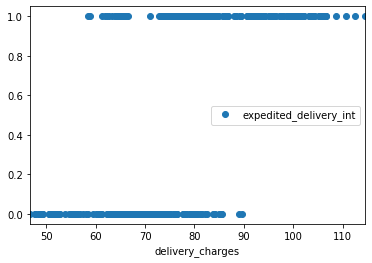

In [65]:
missing_data.plot(x = "delivery_charges", y = "expedited_delivery_int",style = "o")

As we can see, for delivery charges greater than 90, the expedited delivery is always true. And for delivery charges less than 58, the expedited delivery is always false. We can now use this to fix our dirty_data.

In [66]:
for index, row in dirty_data.iterrows():
    if (row["delivery_charges"] > 90):
        dirty_data.at[index,"is_expedited_delivery"] = True
    elif (row["delivery_charges"] < 58):
        dirty_data.at[index,"is_expedited_delivery"] = False    

Thus, we have fixed the 'is_expedited_delivery' column.

In [67]:
#Removing unwanted columns
col_list = ['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart', 'order_price',\
            'delivery_charges', 'customer_lat', 'customer_long', 'coupon_discount', 'order_total', 'season'\
            , 'is_expedited_delivery', 'distance_to_nearest_warehouse', 'latest_customer_review', 'is_happy_customer']

dirty_data = dirty_data[col_list]

In [68]:
print(dirty_data.shape)

(500, 16)


In [69]:
# Exporting to CSV
dirty_data.to_csv(r'30757983_dirty_data_solution.csv',date_format='%Y-%m-%d')

### Conclusion

A chronology of tasks done:
- Loading the Data
- Fixing Errors in 'date' column
- Fixing Lexical errors in Warehouse and Season names
- Matching Dates with Seasons
- Fixing errors in 'order_price' column
- Fixing errors in 'order_total' column
- Fixing errors in 'nearest_warehouse' and 'distance_to_nearest_warehouse' columns
- Fixing errors in 'is_happy_customer'
- Fixing errors in 'is_expedited_delivery'
- Exporting data to csv file

# Missing Data

For Missing Data, we should check all the columns that have null values and thentry to impute values in them.

### Checking the columns for missing values

Let us check the missing values in all columns using the isnull() function.

In [70]:
missing_data = pd.read_csv("30757983_missing_data.csv")

In [71]:
missing_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD429507,ID0283334264,2019-01-30,Thompson,"[('pearTV', 2), ('Thunder line', 1), ('Lucent ...",16030.0,79.72,-37.801340,144.956120,5,15308.22,Summer,False,1.4917,disappointed purchase the phone without a sim ...,1.0
1,ORD047484,ID0844409016,2019-03-25,NaN,"[('iAssist Line', 1), ('Universe Note', 1)]",5675.0,50.52,-37.818945,144.946680,0,5725.52,Autumn,False,NaN,not as described item was described as new. wa...,0.0
2,ORD198600,ID2841675052,2019-09-07,NaN,"[('Universe Note', 1), ('Lucent 330S', 2), ('T...",25990.0,79.99,-37.808931,144.965835,10,23470.99,Spring,False,NaN,"five stars its perfect, i love it.",1.0
3,ORD313848,ID0363406538,2019-04-02,Thompson,"[('iStream', 1), ('Universe Note', 1), ('Toshi...",12280.0,84.41,-37.799793,144.963669,0,12364.41,Autumn,True,2.0463,easy to use i love it.,1.0
4,ORD486512,ID0356452831,2019-10-22,Bakers,"[('Toshika 750', 2), ('iStream', 2), ('Univers...",22150.0,77.75,-37.805487,144.988297,0,22227.75,Spring,False,0.7899,most of the candles i have purchased have been...,1.0


In [72]:
missing_data.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64

We have missing data in 6 columns. These columns are:

- nearest_warehouse
- order_price
- delivery_charges
- order_total
- distance_to_nearest_warehouse
- is_happy_customer

In [73]:
missing_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.000000,500.000000,500.000000,500.000000,485.000000,469.000000,460.000000
mean,13203.979381,76.298370,-37.812649,144.967979,11.510000,11770.086165,1.069363,0.760870
std,7828.772962,14.322793,0.007324,0.021627,8.655619,7041.586293,0.481632,0.427017
min,1010.000000,46.690000,-37.827150,144.916005,0.000000,908.970000,0.064400,0.000000
25%,6900.000000,65.770000,-37.818881,144.952449,5.000000,6248.190000,0.733900,1.000000
50%,11900.000000,76.325000,-37.813227,144.965218,10.000000,10472.010000,1.032300,1.000000
75%,18530.000000,83.515000,-37.806491,144.982808,15.000000,16507.110000,1.370900,1.000000
max,39330.000000,114.520000,-37.798217,145.020271,25.000000,39390.390000,2.792500,1.000000


### Handling missing 'order_price' values

We can see that 'order_price' is a column that has missing values. Let us try to fix this. We already know the individual prices of items, so we will use that to calculate the order_price.

In [74]:
#finding individual prices
ind =0
count_list = []
price_list = []
for item in missing_data['shopping_cart']:
    all_items = eval(item)
    counter_list=[]
    for key, value in full_cart_dict.items():
        count = 0
        for each_item in all_items:
            if each_item[0]== value:
                counter_list.append(each_item[1])
                count += 1
        if count != 1:
            counter_list.append(0)

    count_list.append(counter_list)
    price_list.append(outlier_data['order_price'][ind])
    ind += 1


In [75]:

individual_prices = list(individual_prices)
a = np.array(count_list)
b = np.array([individual_prices[0]])
b=np.transpose(b)
final_order_price = np.matmul(a,b)
final_price=[]
for each in final_order_price:
    final_price.append(each[0])
missing_data['order_price']=final_price

In [76]:
missing_data.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                       0
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64

As we can see, we have fixed the 'order_price' column.

### Handling Missing Order Total Values

After fixing the 'order_price' column, let us all fix the 'order_total' column using the formula we discussed in Dirty Data section.

In [77]:
discount_price = 0
calculated_price = 0
for index, row in missing_data.iterrows():
   
    if row['coupon_discount'] != 0:
        discount_price = row['coupon_discount']/100
        #print(discount_price)
    else:
        discount_price = 0
    
    calculated_price = row['order_price'] * discount_price
    
    missing_data.at[index,'check_total'] = (missing_data.at[index,'order_price'] - calculated_price) + missing_data.at[index,'delivery_charges']
    
missing_data['check_total'] = missing_data['check_total'].round(2) 

In [78]:
i = 0
for index, row in missing_data.iterrows():
    if (pd.isnull(row["order_total"])):
        i = i+1
        #print(index)
        missing_data.at[index,'order_total'] = missing_data.at[index,'check_total']
        
print(i,"rows had missing values and have been fixed.")


15 rows had missing values and have been fixed.


In [79]:
missing_data.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                       0
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
check_total                      40
dtype: int64

As we can see, we have fixed the 'order_total' column as well.

### Handling Missing 'distance_to_nearest_warehouse' values

Let us try to find values for 'distance_to_nearest_warehouse' column. We will use the Haversine formula already used previously, and try to find the smallest distance out of all the three warehouses. We shall impute the smallest distance as the final answer.

In [80]:
missing_data.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                       0
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
check_total                      40
dtype: int64

In [81]:
for index,row in missing_data.iterrows():
    if (pd.isnull(row["distance_to_nearest_warehouse"])):
        
        dist_Nickolson = haversine(row["customer_lat"],row["customer_long"],-37.818595,144.969551).round(4)
        dist_Thompson = haversine(row["customer_lat"],row["customer_long"],-37.812673,144.947069).round(4)
        dist_Bakers = haversine(row["customer_lat"],row["customer_long"],-37.809996,144.995232).round(4)
        smallest_dist = min(dist_Nickolson,dist_Thompson,dist_Bakers)
#         print(dist_Nickolson,dist_Thompson,dist_Bakers)
#         print(smallest_dist)
        missing_data.loc[index,"distance_to_nearest_warehouse"] = min(dist_Nickolson,dist_Thompson,dist_Bakers)
    

In [82]:
missing_data.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                       0
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                40
check_total                      40
dtype: int64

As we can see, there are no null values for the 'distance_to_nearest_warehouse' column.

### Handling Missing 'nearest_warehouse' values

In [83]:
missing_data.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                       0
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                40
check_total                      40
dtype: int64

Let us now find values for the 'nearest_warehouse' column. As we have our customer geo-locations, we shall use the warehouse locations(taken from the 'warehouses.csv' file). We shall find the smallest distance and impute the distances and the corresponding nearest warehouse.

In [84]:
i=0
for index,row in missing_data.iterrows():
    if (pd.isnull(row["nearest_warehouse"])):
        
        dist_Nickolson = haversine(row["customer_lat"],row["customer_long"],-37.818595,144.969551).round(4)
        dist_Thompson = haversine(row["customer_lat"],row["customer_long"],-37.812673,144.947069).round(4)
        dist_Bakers = haversine(row["customer_lat"],row["customer_long"],-37.809996,144.995232).round(4)
        smallest_dist = min(dist_Nickolson,dist_Thompson,dist_Bakers)
#         print(dist_Nickolson,dist_Thompson,dist_Bakers)
#         print(smallest_dist)
        if dist_Nickolson < dist_Thompson and dist_Nickolson < dist_Bakers:
            #print(dist_Nickolson,dist_Thompson,dist_Bakers)
            missing_data.loc[index,"smallest_dist"] = dist_Nickolson
            missing_data["nearest_warehouse"] = "Nickolson"
        elif dist_Thompson < dist_Nickolson and dist_Thompson < dist_Bakers:
#             print("Smallest Thompson")
#             print(dist_Nickolson,dist_Thompson,dist_Bakers)
#             print("############")
            missing_data.loc[index,"smallest_dist"] = dist_Thompson
            missing_data["nearest_warehouse"] = "Thompson"
        elif dist_Bakers < dist_Thompson and dist_Bakers < dist_Nickolson:
#             print("Smallest Baker") 
#             print(dist_Nickolson,dist_Thompson,dist_Bakers)
            missing_data.loc[index,"smallest_dist"] = dist_Bakers
            missing_data["nearest_warehouse"] = "Bakers"
        i=i+1
print(i,"rows had mising values and have been fixed.")

55 rows had mising values and have been fixed.


In [85]:
missing_data.isnull().sum()

order_id                           0
customer_id                        0
date                               0
nearest_warehouse                  0
shopping_cart                      0
order_price                        0
delivery_charges                  40
customer_lat                       0
customer_long                      0
coupon_discount                    0
order_total                        0
season                             0
is_expedited_delivery              0
distance_to_nearest_warehouse      0
latest_customer_review             0
is_happy_customer                 40
check_total                       40
smallest_dist                    445
dtype: int64

We see that all the nearest_warehouse missing values have been fixed.

### Handling Missing 'is_happy_customer' values

In [86]:
missing_data.isnull().sum()

order_id                           0
customer_id                        0
date                               0
nearest_warehouse                  0
shopping_cart                      0
order_price                        0
delivery_charges                  40
customer_lat                       0
customer_long                      0
coupon_discount                    0
order_total                        0
season                             0
is_expedited_delivery              0
distance_to_nearest_warehouse      0
latest_customer_review             0
is_happy_customer                 40
check_total                       40
smallest_dist                    445
dtype: int64

Let us try to generate the missing values for the 'is_happy_customer' columns using the 'latest_customer_review' column. We shall use the SentimentIntensityAnalyzer.

In [87]:
missing_data['scores'] = missing_data['latest_customer_review'].apply(lambda review: sid.polarity_scores(review))

missing_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,check_total,smallest_dist,scores
0,ORD429507,ID0283334264,2019-01-30,Nickolson,"[('pearTV', 2), ('Thunder line', 1), ('Lucent ...",16030.0,79.72,-37.801340,144.956120,5,15308.22,Summer,False,1.4917,disappointed purchase the phone without a sim ...,1.0,15308.22,NaN,"{'neg': 0.074, 'neu': 0.815, 'pos': 0.11, 'com..."
1,ORD047484,ID0844409016,2019-03-25,Nickolson,"[('iAssist Line', 1), ('Universe Note', 1)]",5675.0,50.52,-37.818945,144.946680,0,5725.52,Autumn,False,0.6990,not as described item was described as new. wa...,0.0,5725.52,0.6990,"{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compou..."
2,ORD198600,ID2841675052,2019-09-07,Nickolson,"[('Universe Note', 1), ('Lucent 330S', 2), ('T...",25990.0,79.99,-37.808931,144.965835,10,23470.99,Spring,False,1.1243,"five stars its perfect, i love it.",1.0,23470.99,1.1243,"{'neg': 0.0, 'neu': 0.336, 'pos': 0.664, 'comp..."
3,ORD313848,ID0363406538,2019-04-02,Nickolson,"[('iStream', 1), ('Universe Note', 1), ('Toshi...",12280.0,84.41,-37.799793,144.963669,0,12364.41,Autumn,True,2.0463,easy to use i love it.,1.0,12364.41,NaN,"{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'comp..."
4,ORD486512,ID0356452831,2019-10-22,Nickolson,"[('Toshika 750', 2), ('iStream', 2), ('Univers...",22150.0,77.75,-37.805487,144.988297,0,22227.75,Spring,False,0.7899,most of the candles i have purchased have been...,1.0,22227.75,NaN,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp..."


In [88]:
missing_data['compound_score']  = missing_data['scores'].apply(lambda score_dict: score_dict['compound'])

missing_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,check_total,smallest_dist,scores,compound_score
0,ORD429507,ID0283334264,2019-01-30,Nickolson,"[('pearTV', 2), ('Thunder line', 1), ('Lucent ...",16030.0,79.72,-37.801340,144.956120,5,15308.22,Summer,False,1.4917,disappointed purchase the phone without a sim ...,1.0,15308.22,NaN,"{'neg': 0.074, 'neu': 0.815, 'pos': 0.11, 'com...",0.1280
1,ORD047484,ID0844409016,2019-03-25,Nickolson,"[('iAssist Line', 1), ('Universe Note', 1)]",5675.0,50.52,-37.818945,144.946680,0,5725.52,Autumn,False,0.6990,not as described item was described as new. wa...,0.0,5725.52,0.6990,"{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compou...",-0.2755
2,ORD198600,ID2841675052,2019-09-07,Nickolson,"[('Universe Note', 1), ('Lucent 330S', 2), ('T...",25990.0,79.99,-37.808931,144.965835,10,23470.99,Spring,False,1.1243,"five stars its perfect, i love it.",1.0,23470.99,1.1243,"{'neg': 0.0, 'neu': 0.336, 'pos': 0.664, 'comp...",0.8360
3,ORD313848,ID0363406538,2019-04-02,Nickolson,"[('iStream', 1), ('Universe Note', 1), ('Toshi...",12280.0,84.41,-37.799793,144.963669,0,12364.41,Autumn,True,2.0463,easy to use i love it.,1.0,12364.41,NaN,"{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'comp...",0.7964
4,ORD486512,ID0356452831,2019-10-22,Nickolson,"[('Toshika 750', 2), ('iStream', 2), ('Univers...",22150.0,77.75,-37.805487,144.988297,0,22227.75,Spring,False,0.7899,most of the candles i have purchased have been...,1.0,22227.75,NaN,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.7684


In [89]:
# If Review contains None, set it to 1
for index, row in missing_data.iterrows():
    if (row['latest_customer_review'] == "None"):
        dirty_data.at[index,'compound_score'] = 1

In [90]:
missing_data['Review'] = missing_data['compound_score'].apply(lambda c: 1.0 if c >=0.05 else 0.0)

In [91]:
i=0

for index, row in missing_data.iterrows():
    if (pd.isnull(row["is_happy_customer"])):
        if((row['Review'] == 1.0 and row['is_happy_customer'] == 1.0 )\
           | (row['Review'] == 0.0 and row['is_happy_customer'] == 0.0 )):
            pass
        else:
            missing_data['is_happy_customer'] = missing_data['Review']
            i = i+1


print(i,"rows had mising values and have been fixed.")


40 rows had mising values and have been fixed.


In [92]:
missing_data.isnull().sum()

order_id                           0
customer_id                        0
date                               0
nearest_warehouse                  0
shopping_cart                      0
order_price                        0
delivery_charges                  40
customer_lat                       0
customer_long                      0
coupon_discount                    0
order_total                        0
season                             0
is_expedited_delivery              0
distance_to_nearest_warehouse      0
latest_customer_review             0
is_happy_customer                  0
check_total                       40
smallest_dist                    445
scores                             0
compound_score                     0
Review                             0
dtype: int64

### Handling Missing 'delivery_charges' Values

In [93]:
missing_data.isnull().sum()

order_id                           0
customer_id                        0
date                               0
nearest_warehouse                  0
shopping_cart                      0
order_price                        0
delivery_charges                  40
customer_lat                       0
customer_long                      0
coupon_discount                    0
order_total                        0
season                             0
is_expedited_delivery              0
distance_to_nearest_warehouse      0
latest_customer_review             0
is_happy_customer                  0
check_total                       40
smallest_dist                    445
scores                             0
compound_score                     0
Review                             0
dtype: int64

The only column left to find missing values is the 'delivery_charges' column. For this let us create a Linear model.

### Linear Model

The model changes depending on the seasons and depends on :
- Distance between customer and nearest warehouse
- Whether the customer wants an expedited delivery
- Whether the customer was happy with his/her last purchase

In [94]:
#Removing unwanted columns
missing_data = missing_data[col_list]

In [95]:
missing_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                float64
dtype: object

We will build a different linear model for each season. We shall also use build the model using only the not null values.

In [96]:
# Building the linear model

lm_Summer = LinearRegression()
lm_Spring = LinearRegression()
lm_Autumn = LinearRegression()
lm_Winter = LinearRegression()

In [97]:
# Seperating data based on the seasons
# Create Missing data dataframe without null values
missing_data_Summer = missing_data.loc[(missing_data['season'] == 'Summer') \
                                       & (missing_data['delivery_charges'].notnull())]
missing_data_Spring = missing_data.loc[(missing_data['season'] == 'Spring') \
                                       & (missing_data['delivery_charges'].notnull())]
missing_data_Autumn = missing_data.loc[(missing_data['season'] == 'Autumn') \
                                       & (missing_data['delivery_charges'].notnull())]
missing_data_Winter = missing_data.loc[(missing_data['season'] == 'Winter')\
                                       & (missing_data['delivery_charges'].notnull()) ]

#Create outlier data 
outlier_data_Summer = outlier_data.loc[(outlier_data['season'] == 'Summer')]
outlier_data_Spring = outlier_data.loc[(outlier_data['season'] == 'Spring')]
outlier_data_Autumn = outlier_data.loc[(outlier_data['season'] == 'Autumn') ]
outlier_data_Winter = outlier_data.loc[(outlier_data['season'] == 'Winter') ]

# Create Missing data dataframe with Null values
data_null_Summer = missing_data.loc[(missing_data['season'] == 'Summer') \
                                    & (missing_data['delivery_charges'].isnull())]
data_null_Spring = missing_data.loc[(missing_data['season'] == 'Spring') \
                                    & (missing_data['delivery_charges'].isnull())]
data_null_Autumn = missing_data.loc[(missing_data['season'] == 'Autumn') \
                                & (missing_data['delivery_charges'].isnull())]
data_null_Winter = missing_data.loc[(missing_data['season'] == 'Winter') \
                                    & (missing_data['delivery_charges'].isnull())]

In [98]:
#Combining the dataset on seasons
combined_data_Summer = missing_data_Summer.append(outlier_data_Summer, ignore_index=True)
combined_data_Spring = missing_data_Spring.append(outlier_data_Spring, ignore_index=True)
combined_data_Autumn = missing_data_Autumn.append(outlier_data_Autumn, ignore_index=True)
combined_data_Winter = missing_data_Winter.append(outlier_data_Winter, ignore_index=True)

Let us now create models for all the seasons.We can see that our combined data has no Null values. After building the model, we shall test it on the null values of our dataset and impute the missing values by predicting them using the model.

### Creating model and imputing values for Summer season

In [99]:
# Model for Summer season
# Training and testing data
train_Summer_x = combined_data_Summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Summer_y = combined_data_Summer[['delivery_charges']]
test_Summer = data_null_Summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Summer.fit(train_Summer_x,train_Summer_y)
#score
lm_Summer.score(train_Summer_x,train_Summer_y)

0.6861664375110939

In [100]:
# Predictions
predicted_Summer = lm_Summer.predict(test_Summer)
count = 0
for index, row in missing_data.iterrows():
    if (math.isnan(row['delivery_charges'])) and (row['season'] == 'Summer'):
        missing_data.loc[index,'delivery_charges'] = predicted_Summer[count]
        count += 1

### Creating model and imputing values for Spring season

In [101]:
# Model for Spring season
# Training and testing data
train_Spring_x = combined_data_Spring[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Spring_y = combined_data_Spring[['delivery_charges']]
test_Spring = data_null_Spring[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Spring.fit(train_Spring_x,train_Spring_y)
#score
lm_Spring.score(train_Spring_x,train_Spring_y)

0.6179514678160942

In [102]:
# Predictions
predicted_Spring = lm_Spring.predict(test_Spring)
count = 0
for index, row in missing_data.iterrows():
    if (math.isnan(row['delivery_charges'])) and (row['season'] == 'Spring'):
        missing_data.loc[index,'delivery_charges'] = predicted_Spring[count]
        count += 1

### Creating model and imputing values for Autumn season

In [103]:
# Model for utumn season
# Training and testing data
train_Autumn_x = combined_data_Autumn[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Autumn_y = combined_data_Autumn[['delivery_charges']]
test_Autumn = data_null_Autumn[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Autumn.fit(train_Autumn_x,train_Autumn_y)
#score
lm_Autumn.score(train_Autumn_x,train_Autumn_y)

0.5309052396237921

In [104]:
# Predictions
predicted_Autumn = lm_Spring.predict(test_Autumn)
count = 0
for index, row in missing_data.iterrows():
    if (math.isnan(row['delivery_charges'])) and (row['season'] == 'Autumn'):
        missing_data.loc[index,'delivery_charges'] = predicted_Autumn[count]
        count += 1

### Creating model and imputing values for Winter season

In [105]:
# Model for Winter season
# Training and testing data
train_Winter_x = combined_data_Winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Winter_y = combined_data_Winter[['delivery_charges']]
test_Winter = data_null_Winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Winter.fit(train_Winter_x,train_Winter_y)
#score
lm_Winter.score(train_Winter_x,train_Winter_y)

0.5695276499927948

In [106]:
# Predictions
predicted_Winter = lm_Spring.predict(test_Winter)
count = 0
for index, row in missing_data.iterrows():
    if (math.isnan(row['delivery_charges'])) and (row['season'] == 'Winter'):
        missing_data.loc[index,'delivery_charges'] = predicted_Winter[count]
        count += 1

In [107]:
missing_data.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64

We have successfully fixed all the missing values from the dataset.

In [108]:
# Exporting to CSV file
missing_data.to_csv(r'30757983_missing_data_solution.csv',date_format='%Y-%m-%d')

# Outlier Data

As specified, we have outliers only in our 'delivery_charges' column. So we will use boxplots and linear models to find these outliers and remove them from our data.

In [109]:
print(outlier_data.shape)
outlier_data.head()

(500, 16)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD125886,ID0207078611,2019-05-29,Bakers,"[('pearTV', 1), ('Olivia x460', 1)]",7535,86.44,-37.826375,145.018208,5,7244.69,Autumn,True,2.7214,was honestly very surprised. i ordered the spa...,True
1,ORD120970,ID3543024079,2019-04-26,Thompson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",6060,65.07,-37.811899,144.956402,10,5519.07,Autumn,False,0.8253,great phone for price! phone recieved was bran...,True
2,ORD109402,ID2249465789,2019-10-28,Bakers,"[('Lucent 330S', 1), ('pearTV', 2), ('Thunder ...",18480,102.02,-37.827380,145.013620,0,18582.02,Spring,True,2.5217,2 foot drop i dropped the phone about 2 feet a...,False
3,ORD182570,ID0168396927,2019-07-11,Nickolson,"[('Candle Inferno', 2), ('pearTV', 1)]",7170,76.89,-37.811006,144.961196,15,6171.39,Winter,False,1.1196,not refurbished! super disappointed when i got...,False
4,ORD258501,ID5002595116,2019-04-10,Thompson,"[('iAssist Line', 2), ('Alcon 10', 2), ('Lucen...",31120,78.70,-37.812005,144.953389,25,23418.70,Autumn,True,0.5608,five stars fast shipping and works great! as a...,True


We see that our outlier data has 500 rows and 16 columns.

Let us build a linear model to calculate the predictd value for delivery_charges column. We shall use this predicted value to build our boxplot and remove outliers. Weare combining our missing and outlier data to create a better model.

In [110]:
# Building the linear model
lm_Summer_outlier = LinearRegression()
lm_Spring_outlier = LinearRegression()
lm_Autumn_outlier = LinearRegression()
lm_Winter_outlier = LinearRegression()

In [111]:
#Reference: https://stackoverflow.com/questions/47182183/pandas-chained-assignment-warning-exception-handling
pd.options.mode.chained_assignment = None

In [112]:
#Creating Missing data seperated on seasons without null values
missing_data_Summer = missing_data.loc[(missing_data['season'] == 'Summer')\
                                       & (missing_data['delivery_charges'].notnull())]
missing_data_Spring = missing_data.loc[(missing_data['season'] == 'Spring')\
                                       & (missing_data['delivery_charges'].notnull())]
missing_data_Autumn = missing_data.loc[(missing_data['season'] == 'Autumn')\
                                       & (missing_data['delivery_charges'].notnull())]
missing_data_Winter = missing_data.loc[(missing_data['season'] == 'Winter')\
                                       & (missing_data['delivery_charges'].notnull())]


# Keeping track of outliers
missing_data_Summer['Outlier']= 'NO'
missing_data_Spring['Outlier']= 'NO'
missing_data_Autumn['Outlier']= 'NO'
missing_data_Winter['Outlier']= 'NO'

### Creating model for Summer season

In [113]:
# Model for Summer season
# Training and testing data
train_Summer_x_outlier = missing_data_Summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Summer_y_outlier = missing_data_Summer[['delivery_charges']]
test_Summer_outlier = missing_data_Summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Summer_outlier.fit(train_Summer_x_outlier,train_Summer_y_outlier)
#score
lm_Summer_outlier.score(train_Summer_x_outlier,train_Summer_y_outlier)

0.993893054631004

### Creating model for Spring season

In [114]:
# Model for Spring season
# Training and testing data
train_Spring_x_outlier = missing_data_Spring[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Spring_y_outlier = missing_data_Spring[['delivery_charges']]
test_Spring_outlier = missing_data_Spring[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Spring_outlier.fit(train_Spring_x_outlier,train_Spring_y_outlier)
#score
lm_Spring_outlier.score(train_Spring_x_outlier,train_Spring_y_outlier)

0.9960808127042844

### Creating model for Autumn season

In [115]:
# Model for Autumn season
# Training and testing data
train_Autumn_x_outlier = missing_data_Autumn[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Autumn_y_outlier = missing_data_Autumn[['delivery_charges']]
test_Autumn_outlier = missing_data_Autumn[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Autumn_outlier.fit(train_Autumn_x_outlier,train_Autumn_y_outlier)
#score
lm_Autumn_outlier.score(train_Autumn_x_outlier,train_Autumn_y_outlier)

0.8620998207676794

### Creating model for Winter season

In [116]:
# Model for Winter season
# Training and testing data
train_Winter_x_outlier = missing_data_Winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
train_Winter_y_outlier = missing_data_Winter[['delivery_charges']]
test_Winter_outlier = missing_data_Winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

# model
lm_Winter_outlier.fit(train_Winter_x_outlier,train_Winter_y_outlier)
#score
lm_Winter_outlier.score(train_Winter_x_outlier,train_Winter_y_outlier)

0.7716336369982316

In [117]:
#Diving dataset according to seasons
outlier_Summer = outlier_data.loc[(outlier_data['season']=='Summer')]
outlier_Spring = outlier_data.loc[(outlier_data['season']=='Spring')]
outlier_Autumn = outlier_data.loc[(outlier_data['season']=='Autumn')]
outlier_Winter = outlier_data.loc[(outlier_data['season']=='Winter')]

### Predictions

Now let us create predicted delivery charges values for the outlier data for all the seasons.

### Summer

In [118]:
outlier_data_Summer = outlier_Summer[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
delivery_charges_summer = lm_Summer_outlier.predict(outlier_data_Summer)

outlier_Summer['Predicted_charges'] = delivery_charges_summer

### Spring

In [119]:
outlier_data_Spring = outlier_Spring[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
delivery_charges_spring = lm_Spring_outlier.predict(outlier_data_Spring)

outlier_Spring['Predicted_charges'] = delivery_charges_spring

### Autumn

In [120]:
outlier_data_Autumn = outlier_Autumn[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
delivery_charges_Autumn = lm_Autumn_outlier.predict(outlier_data_Autumn)

outlier_Autumn['Predicted_charges'] = delivery_charges_Autumn

### Winter

In [121]:
outlier_data_Winter= outlier_Winter[['distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
delivery_charges_winter = lm_Winter_outlier.predict(outlier_data_Winter)

outlier_Winter['Predicted_charges'] = delivery_charges_winter

In [122]:
#Combine dataframe
combined_df = pd.concat([outlier_Summer,outlier_Spring,outlier_Autumn,outlier_Winter],sort=False)

We create residual delivery charges values, which is the difference of actual and present delivery charges values. We will use this to find the outliers.

In [123]:
combined_df['residual_delivery_charges'] = combined_df['delivery_charges'] - combined_df['Predicted_charges']

In [124]:
#Dividing the cobined dataset according to seasons
plot_Summer = combined_df.loc[combined_df['season'] == 'Summer']
plot_Spring = combined_df.loc[combined_df['season'] == 'Spring']
plot_Autumn = combined_df.loc[combined_df['season'] == 'Autumn']
plot_Winter = combined_df.loc[combined_df['season'] == 'Winter']


We now remove all the flier values, which are values past the whiskers, in order to remove our outliers. The code will run until all the outliers are removed. We will do this for each season's dataset and then combine the datsets together.

### Removing outliers for Summer season data

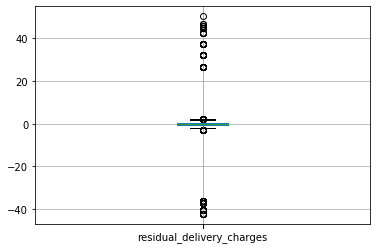

In [125]:
some_outliers = 1
while some_outliers == 1:
    _, bp_Summer = plot_Summer.boxplot(column='residual_delivery_charges', return_type='both')
    # Getting array of list of outliers
    outliers_Summer = [flier.get_ydata() for flier in bp_Summer["fliers"]]
    # if the length is greater than 0
    if len(outliers_Summer[0] > 0):
        max_value = max(outliers_Summer[0], key=abs)
        # Removing the absolute maximum
        plot_Summer = plot_Summer[plot_Summer['residual_delivery_charges'] != max_value]
    else:
        # when no outliers are there
        some_outliers = 0

### Removing outliers for Spring season data

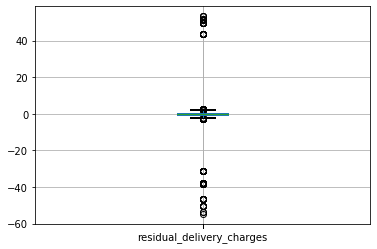

In [126]:
some_outliers = 1
while some_outliers == 1:
    _, bp_Spring = plot_Spring.boxplot(column='residual_delivery_charges', return_type='both')
    # Getting array of list of outliers
    outliers_Spring = [flier.get_ydata() for flier in bp_Spring["fliers"]]
    # if the length is greater than 0
    if len(outliers_Spring[0] > 0):
        max_value = max(outliers_Spring[0], key=abs)
        # Removing the absolute maximum
        plot_Spring = plot_Spring[plot_Spring['residual_delivery_charges'] != max_value]
    else:
        # when no outliers are there
        some_outliers = 0

### Removing outliers for Autumn season data

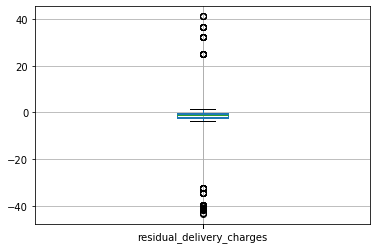

In [127]:
some_outliers = 1
while some_outliers == 1:
    _, bp_Autumn = plot_Autumn.boxplot(column='residual_delivery_charges', return_type='both')
    # Getting array of list of outliers
    outliers_Autumn = [flier.get_ydata() for flier in bp_Autumn["fliers"]]
    # if the length is greater than 0
    if len(outliers_Autumn[0] > 0):
        max_value = max(outliers_Autumn[0], key=abs)
        # Removing the absolute maximum
        plot_Autumn= plot_Autumn[plot_Autumn['residual_delivery_charges'] != max_value]
    else:
        # when no outliers are there
        some_outliers = 0

### Removing outliers for Winter season data

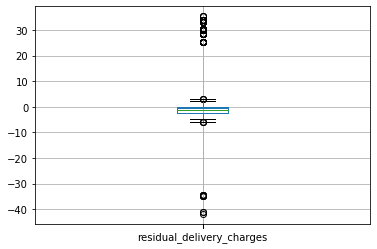

In [128]:
some_outliers = 1
while some_outliers == 1:
    _, bp_Winter = plot_Winter.boxplot(column='residual_delivery_charges', return_type='both')
    # Getting array of list of outliers
    outliers_Winter = [flier.get_ydata() for flier in bp_Winter["fliers"]]
    # if the length is greater than 0
    if len(outliers_Winter[0] > 0):
        max_value = max(outliers_Winter[0], key=abs)
        # Removing the absolute maximum
        plot_Winter = plot_Winter[plot_Winter['residual_delivery_charges'] != max_value]
    else:
        # when no outliers are there
        some_outliers = 0

## Data without Outliers

Let us now see our boxplots wothout the outlier values. This can prove that our outlier values are correctly removed.

### Summer

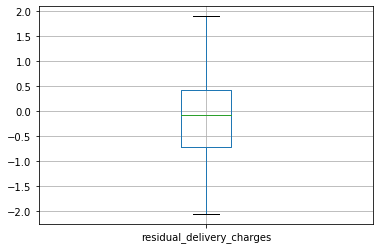

In [129]:
# Cleaned data for Summer season
_, bp_Summer = plot_Summer.boxplot(column='residual_delivery_charges', return_type='both')

### Spring

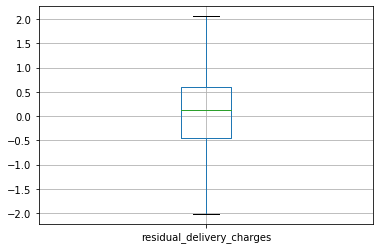

In [130]:
# Cleaned data for Spring season
_, bp_Spring = plot_Spring.boxplot(column='residual_delivery_charges', return_type='both')

### Autumn

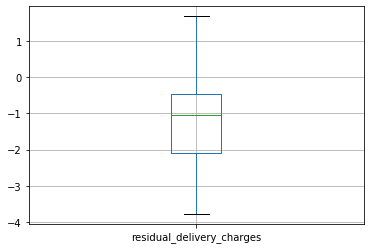

In [131]:
# Cleaned data for Autumn season
_, bp_Autumn = plot_Autumn.boxplot(column='residual_delivery_charges', return_type='both')

### Winter

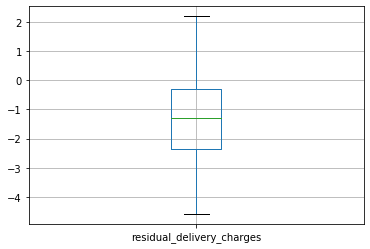

In [132]:
# Cleaned data for Winter season
_, bp_Winter = plot_Winter.boxplot(column='residual_delivery_charges', return_type='both')

In [133]:
#Combine the datset
final_outlier_data = pd.concat([plot_Summer,plot_Spring,plot_Autumn,plot_Winter],sort=False)

In [134]:
#Keeping only required columns
final_outlier_data = final_outlier_data[col_list]

In [135]:
# Checking the number of total outliers
final_outlier_data.shape

(439, 16)

## Conclusion

We were able to remove the outlier values for the dataset. We used a linear model to create predicted values for delivery charges and then use those to create residual values. We use those to define our boxplot and then remove the outlier values.

## References

- https://www.thetopsites.net/article/58381333.shtml
- https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664
- https://stackoverflow.com/questions/43577086/pandas-calculate-haversine-distance-within-each-group-of-rows/43577275
- https://stackoverflow.com/questions/33518472/how-to-get-boxplot-data-for-matplotlib-boxplots

# END